In [ ]:
# Date Processing Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import pickle
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# raw dataset which includes following:
# customer demographics,mobilephones purchased with phones specification and also with Paymentmode 
# and transaction time and also with some extra data like account-created time and last login time
df=pd.read_csv('../datasets/Dataset.csv')
# dataset includes following columns:
# ['Transaction_date', 'Payment_Type', 'City', 'State', 'Country',
#  'Account_Created', 'Last_Login', 'ID', 'Count', 'Brand', 'Model',
#  'Freq', 'Processor', 'Front Camera', 'Rear Camera', 'RAM', 'Storage',
#  'Battery', 'Score']

In [3]:
df.head()

Transaction_date Payment_Type           City     State         Country  \
0  2019-01-02 06:17:00   Mastercard       Basildon   England  United Kingdom   
1  2019-01-06 07:45:00         Visa         London   England  United Kingdom   
2  2019-01-14 01:28:00   Mastercard  Milton Keynes   England  United Kingdom   
3  2019-01-20 08:58:00         Visa       Edmonton   Alberta          Canada   
4  2019-01-09 14:25:00         Amex           Guer  Brittany          France   

       Account_Created           Last_Login  ID  Count  Brand  \
0  2019-01-02 06:00:00  2019-01-02 06:08:00   1      1  Apple   
1  2019-01-06 07:00:00  2019-01-06 09:17:00  19      2  Apple   
2  2016-06-24 15:10:00  2019-02-07 00:26:00  19      2  Apple   
3  2018-12-24 17:51:00  2019-02-18 09:42:00  37      3  Apple   
4  2018-04-07 00:00:00  2019-01-26 05:32:00  37      3  Apple   

                 Model  Freq         Processor  Front Camera  Rear Camera  \
0       Apple iPhone 7    34  Apple A10 Fusion             7           12   
1       Apple iPhone 7    34  Apple A10 Fusion             7           12   
2      Apple iPhone XR    38  Apple A12 Bionic             7           12   
3       Apple iPhone 7    34  Apple A10 Fusion             7           12   
4  Apple iPhone 8 Plus    31  Apple A11 Bionic             7           12   

   RAM  Storage  Battery  Score             Name  
0    2       32     1960  237.0  jessica hubbard  
1    2       32     1960  237.0     peggy taylor  
2    3       64     2942  346.0     peggy taylor  
3    2       32     1960  237.0       anita hunt  
4    3       64     2691  340.0       anita hunt

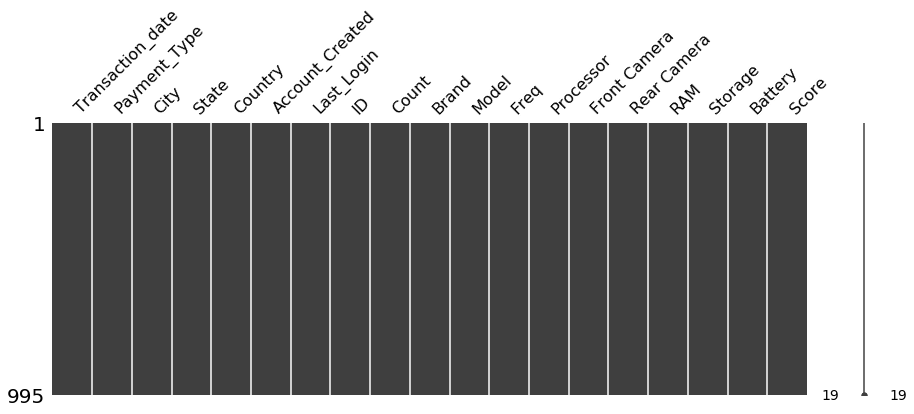

In [4]:
missingno.matrix(df, figsize=(15, 5))

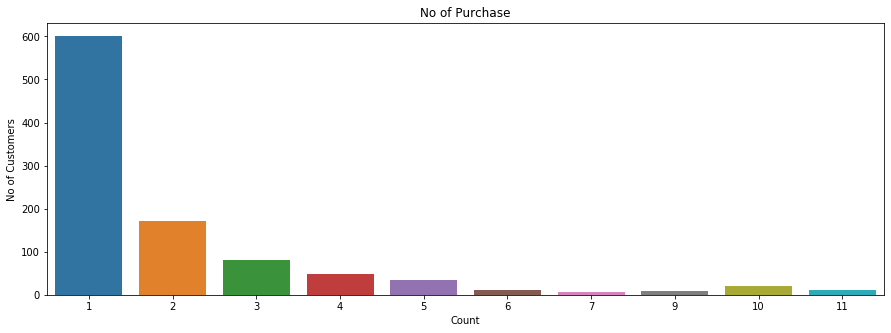

In [4]:
# Visualizing number of phones purchase by each customer
def phones(df):
    figure = plt.figure(figsize=(15,5))
    sns.countplot(data=df,x='Count')
    plt.title('No of Purchase')
    plt.ylabel('No of Customers')
    plt.show()

phones(df) 

In [5]:
#get-user-information
def user_info(id): 
    x=df.loc[df['ID']==45]
    Models=list(x.Model.unique())
    Count=int(x.Count.unique())
    data={"ID":id,"Mobile_Purchased":Models,"Total_Purchased":Count}
    return data

data=user_info(45)
data

{'ID': 45,
 'Mobile_Purchased': ['Apple iPhone 7',
  'Samsung Galaxy S9e',
  'Samsung Galaxy Note 10',
  'Apple iPhone 11',
  'Apple iPhone 11 Pro',
  'Samsung Galaxy Note 8',
  'Apple iPhone 7 Plus'],
 'Total_Purchased': 9}

In [6]:
# Processing Data for Customer Demographics
def create_demographics(df):
    demographics=pd.DataFrame(df.groupby(['City','State','Country'])['Brand'].value_counts())
    demographics.rename(columns={'Brand':'Count'},inplace=True)
    demographics=demographics.reset_index()
    demographics['Brand_Recommend']='Recommend Popular'
    demographics['Brand_Recommend'].loc[demographics['Count']>=2]=demographics['Brand'].loc[demographics['Count']>=2]
    demographics=pd.DataFrame(demographics.groupby(['City','State'])['Brand'].unique()).reset_index()
    demographics.rename(columns={'Brand':'Recommend'},inplace=True)
    demographics['Recommend']=demographics['Recommend'].astype(str)
    demographics['Recommend']=demographics['Recommend'].str.strip('[]')
    return demographics

demographics=create_demographics(df)
demographics

City             State             Recommend
0            Aardal  Sogn og Fjordane               'Apple'
1    Aasgaardstrand          Vestfold             'Samsung'
2        Abbey Town           England               'Apple'
3          Aberdeen          Scotland   'Samsung' 'Windows'
4         Abu Dhabi          Abu Zaby             'Samsung'
..              ...               ...                   ...
761          Zagore      Stara Zagora                  'LG'
762     Zekeriyakoy          Istanbul                 'HTC'
763             Zug               Zug        'LG' 'Samsung'
764         Zumikon            Zurich               'Apple'
765          Zurich            Zurich  'Motorola' 'Samsung'

[766 rows x 3 columns]

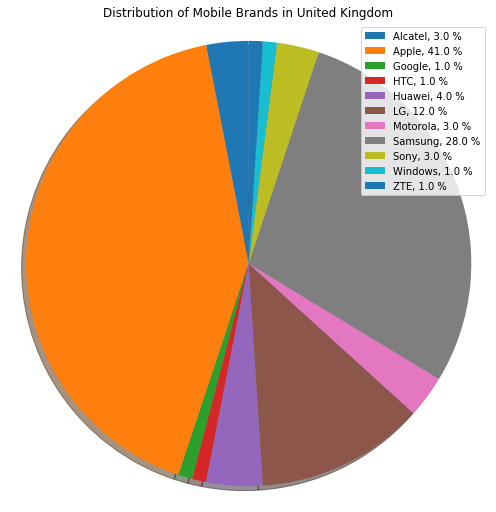

In [7]:
# Plotting Data to visualize number of product of each brand in a country
def plot_country(country):
    plot=df.loc[df['Country']==country]
    plot=pd.DataFrame(plot.groupby('Brand')['ID'].nunique()).reset_index()
    plot.rename(columns={'ID':'count'},inplace=True)
    labels=plot.iloc[:,0].values
    sizes=plot.iloc[:,1].values
    figure = plt.figure(figsize=(7,7))
    patches,texts=plt.pie(sizes,shadow=True,startangle=90)
    plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Distribution of Mobile Brands in '+country)
    plt.show()
    
plot_country('United Kingdom')    

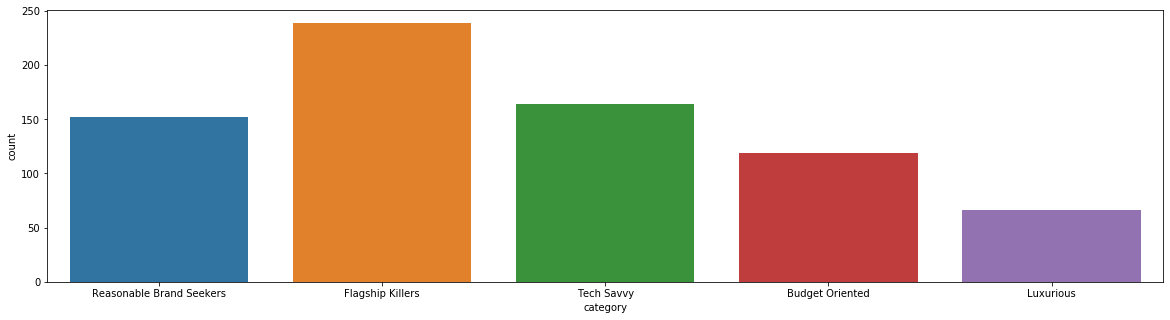

In [8]:
# Visualizing types of customers on the basis of Entuitive Score
def visualizing_user(df,status): 
    classisfying_user = pd.DataFrame(df.groupby('ID')['Score'].mean())
    classisfying_user.reset_index(inplace=True)
    classisfying_user['category'] = np.nan
    j = 0
    for row in classisfying_user.itertuples():
        if row.Score > 500 : 
            classisfying_user['category'][j] = 'Luxurious'
        elif row.Score > 375 : 
            classisfying_user['category'][j] = 'Tech Savvy'
        elif row.Score > 250 : 
            classisfying_user['category'][j] = 'Flagship Killers'
        elif row.Score > 125 : 
            classisfying_user['category'][j] = 'Reasonable Brand Seekers'
        else : 
            classisfying_user['category'][j] = 'Budget Oriented'
        j += 1
    if status :
        fig = plt.figure(figsize=(20, 5))
        sns.countplot(data=classisfying_user, x='category')
    return classisfying_user

x=visualizing_user(df, True)

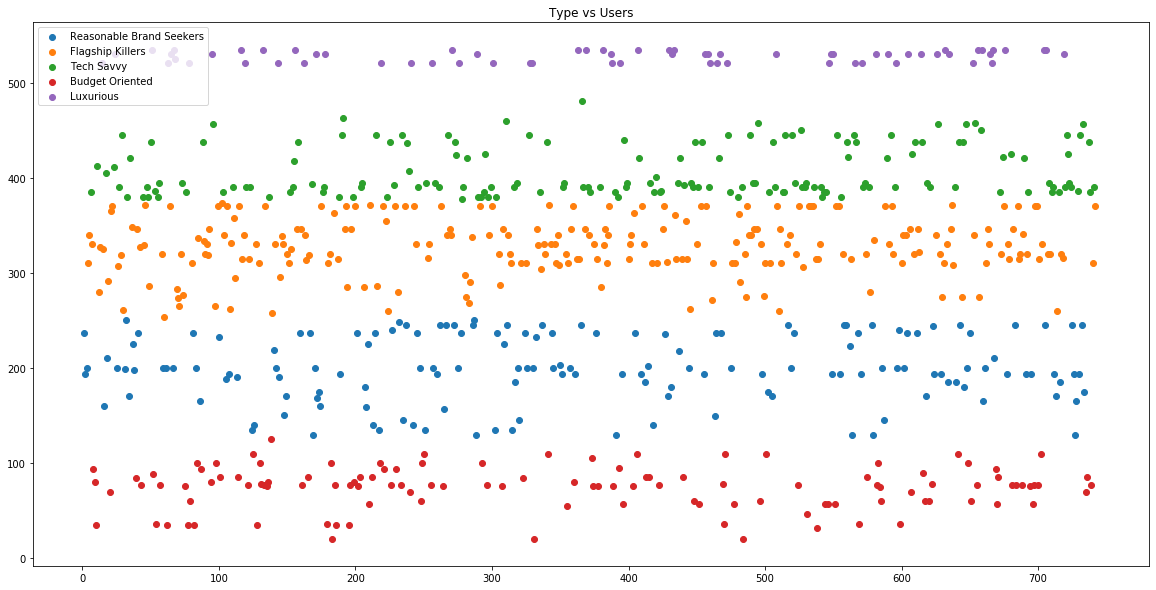

In [9]:
# Visualization of User Type!!!!
classisfying_user = x
figure = plt.figure(figsize=(20,10))
plt.scatter(classisfying_user['ID'].loc[classisfying_user['category']=='Reasonable Brand Seekers'], classisfying_user['Score'].loc[classisfying_user['category']=='Reasonable Brand Seekers'], marker='o', label="Reasonable Brand Seekers")
plt.scatter(classisfying_user['ID'].loc[classisfying_user['category']=='Flagship Killers'], classisfying_user['Score'].loc[classisfying_user['category']=='Flagship Killers'], label="Flagship Killers")
plt.scatter(classisfying_user['ID'].loc[classisfying_user['category']=='Tech Savvy'], classisfying_user['Score'].loc[classisfying_user['category']=='Tech Savvy'], label="Tech Savvy")
plt.scatter(classisfying_user['ID'].loc[classisfying_user['category']=='Budget Oriented'], classisfying_user['Score'].loc[classisfying_user['category']=='Budget Oriented'], label="Budget Oriented")
plt.scatter(classisfying_user['ID'].loc[classisfying_user['category']=='Luxurious'], classisfying_user['Score'].loc[classisfying_user['category']=='Luxurious'], label="Luxurious")
plt.legend()
plt.title('Type vs Users')
plt.show()

In [10]:
# Processing Data to identify Brand Lover in our dataset
def Brand_lover(df):
    brand_lover = pd.DataFrame(df.groupby(['ID','Brand'])['Model'].count()).reset_index()
    brand_lover.rename(columns={'Model':'Brandwise_Count'},inplace=True)
    temp=pd.DataFrame(df.groupby('ID')['Model'].count()).reset_index()
    temp.rename(columns={'Model':'Total_Purchases'},inplace=True)
    brand_lover=brand_lover.merge(temp)    
    columns = df.Brand.unique()
    
    for col in columns:
        brand_lover[col] = np.nan
        
    i = 0
    for row in brand_lover.itertuples():
        x = (row.Brandwise_Count / row.Total_Purchases)
        brand_lover[row.Brand][i] = x
        i+=1
        
    brand_lover=brand_lover.fillna(0)
    temp=brand_lover.groupby(['ID'])[['Apple','Samsung','Motorola','Alcatel','Sony','LG','ZTE','Huawei','HTC','Windows','BLU','Google']].sum()
    brand_lover=brand_lover.drop(columns=['Apple','Samsung','Motorola','Alcatel','Sony','LG','ZTE','Huawei','HTC','Windows','BLU','Google'])    
    brand_lover=brand_lover.drop_duplicates(subset="ID",keep='first')    
    temp=temp.reset_index()
    brand_lover=brand_lover.merge(temp)
    
    brand_lover['Category'] = np.nan
    brand_lover['Confidence'] = np.nan
    i=0
    for row in brand_lover.itertuples():
        p = 'ID=='+str(row.ID)
        x=brand_lover.query(p)
        t=x[['Apple','Samsung','Motorola','Alcatel','Sony','LG','ZTE','Huawei','HTC','Windows','Google','BLU']].apply(lambda x:x.argmax(),axis=1)
        t=pd.DataFrame(t).reset_index()
        maxi = t[0].to_string().split(' ')[4]
        if brand_lover[maxi][i] > 0.6:
            brand_lover['Category'][i] = maxi + ' Lover'
            brand_lover['Confidence'][i] = brand_lover[maxi][i]
        else :
            brand_lover['Category'][i] = 'Sensible'
            brand_lover['Confidence'][i] = 0
        i+=1
        brand_lover['Category'] = np.where(brand_lover['Total_Purchases']<=2,'Sensible',brand_lover['Category'])
        brand_lover['Confidence'] = np.where(brand_lover['Total_Purchases']<=2,0,brand_lover['Confidence'])

    
    return brand_lover
 
brand_lover=Brand_lover(df)    
brand_lover    

ID     Brand  Brandwise_Count  Total_Purchases  Apple  Samsung  \
0      1     Apple                1                1    1.0      0.0   
1      2   Samsung                1                1    0.0      1.0   
2      3  Motorola                1                1    0.0      0.0   
3      4   Samsung                1                1    0.0      1.0   
4      5     Apple                1                1    1.0      0.0   
..   ...       ...              ...              ...    ...      ...   
735  738   Samsung                1                1    0.0      1.0   
736  739   Alcatel                1                1    0.0      0.0   
737  740   Samsung                1                1    0.0      1.0   
738  741   Samsung                1                1    0.0      1.0   
739  742        LG                1                1    0.0      0.0   

     Motorola  Alcatel  Sony   LG  ZTE  Huawei  HTC  Windows  BLU  Google  \
0         0.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
1         0.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
2         1.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
3         0.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
4         0.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
..        ...      ...   ...  ...  ...     ...  ...      ...  ...     ...   
735       0.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
736       0.0      1.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
737       0.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
738       0.0      0.0   0.0  0.0  0.0     0.0  0.0      0.0  0.0     0.0   
739       0.0      0.0   0.0  1.0  0.0     0.0  0.0      0.0  0.0     0.0   

     Category  Confidence  
0    Sensible         0.0  
1    Sensible         0.0  
2    Sensible         0.0  
3    Sensible         0.0  
4    Sensible         0.0  
..        ...         ...  
735  Sensible         0.0  
736  Sensible         0.0  
737  Sensible         0.0  
738  Sensible         0.0  
739  Sensible         0.0  

[740 rows x 18 columns]

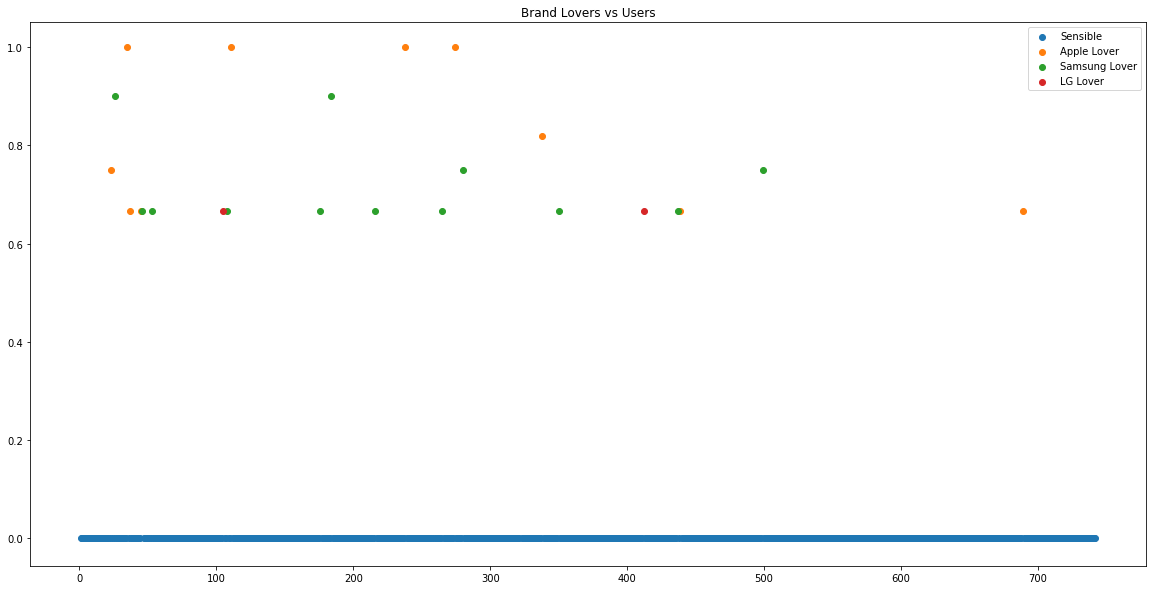

In [10]:
# Visualization of Brand Seekers!!!!
def Brand_lover_visualization(Brand_Lover):
    figure = plt.figure(figsize=(20,10))
    plt.scatter(Brand_Lover['ID'].loc[Brand_Lover['Category']=='Sensible'], Brand_Lover['Confidence'].loc[Brand_Lover['Category']=='Sensible'], marker='o', label="Sensible")
    plt.scatter(Brand_Lover['ID'].loc[Brand_Lover['Category']=='Apple Lover'], Brand_Lover['Confidence'].loc[Brand_Lover['Category']=='Apple Lover'], label="Apple Lover")
    plt.scatter(Brand_Lover['ID'].loc[Brand_Lover['Category']=='Samsung Lover'], Brand_Lover['Confidence'].loc[Brand_Lover['Category']=='Samsung Lover'], label="Samsung Lover")
    plt.scatter(Brand_Lover['ID'].loc[Brand_Lover['Category']=='LG Lover'], Brand_Lover['Confidence'].loc[Brand_Lover['Category']=='LG Lover'], label="LG Lover")
    plt.legend()
    plt.title('Brand Lovers vs Users')
    plt.show()

    
Brand_lover_visualization(brand_lover)

In [11]:
# Processing Data to identify Camera Lovers from our dataset
def Camera_Lovers(df):
    camera_lover=df[['ID','Front Camera','Rear Camera']]
    camera_lover['Camera']=(camera_lover['Front Camera']*camera_lover['Rear Camera'])/(camera_lover['Front Camera'].max()*camera_lover['Rear Camera'].max())
    camera_lover['Type']='Sensible'
    camera_lover['Type'].loc[camera_lover['Camera']>=0.15]='Photophile'
    camera_lover['Type'].loc[camera_lover['Front Camera']>=25]='Selfie-Addict'
    camera_lover.rename(columns={'Camera':'Confidence'},inplace=True)
    camera_lover=camera_lover.sort_values(by='Confidence',ascending=False)
    camera_lover=camera_lover.drop_duplicates(subset='ID',keep='first')
    
    return camera_lover

camera_lover=Camera_Lovers(df)
camera_lover

ID  Front Camera  Rear Camera  Confidence           Type
872  283            32           40    0.833333  Selfie-Addict
877  733            32           40    0.833333  Selfie-Addict
875  627            32           40    0.833333  Selfie-Addict
874  424            32           40    0.833333  Selfie-Addict
876  647            32           40    0.833333  Selfie-Addict
..   ...           ...          ...         ...            ...
847  128             5            8    0.026042       Sensible
848  186             5            8    0.026042       Sensible
931  697             5            8    0.026042       Sensible
982  657             0            0    0.000000       Sensible
981  630             0            0    0.000000       Sensible

[740 rows x 5 columns]

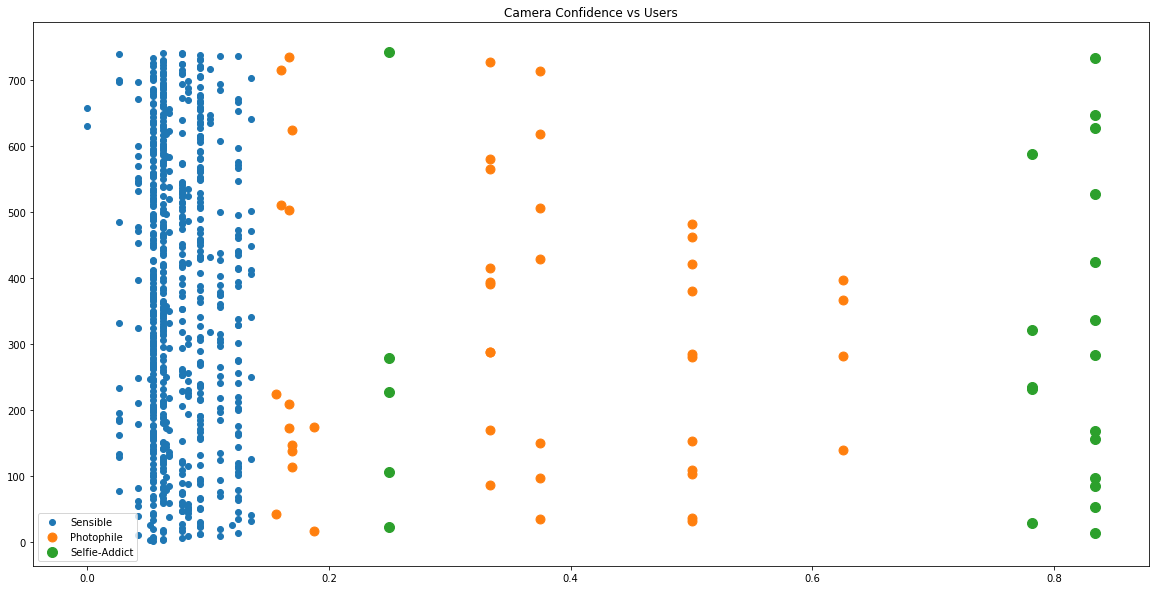

In [12]:
# Visualization of Camera Lovers!!!!
def Camera_Lovers_visualization(Camera_Lover):
    figure = plt.figure(figsize=(20,10))
    plt.scatter(Camera_Lover['Confidence'].loc[Camera_Lover['Type']=='Sensible'], Camera_Lover['ID'].loc[Camera_Lover['Type']=='Sensible'], marker='o', label="Sensible")
    plt.scatter(Camera_Lover['Confidence'].loc[Camera_Lover['Type']=='Photophile'], Camera_Lover['ID'].loc[Camera_Lover['Type']=='Photophile'], label="Photophile", s=80)
    plt.scatter(Camera_Lover['Confidence'].loc[Camera_Lover['Type']=='Selfie-Addict'], Camera_Lover['ID'].loc[Camera_Lover['Type']=='Selfie-Addict'], label="Selfie-Addict", s=100)
    plt.legend()
    plt.title('Camera Confidence vs Users')
    plt.show()

Camera_Lovers_visualization(camera_lover)    

In [13]:
def convert_days(df):
    df['current'] = pd.to_datetime('now')
    arr=['Transaction_date','Account_Created', 'Last_Login']
    for i in arr:
        df[i] = pd.to_datetime(df[i])
        df[i] = df['current'].sub(df[i]) 
        df[i] = df[i] / np.timedelta64(1,'D')
        df[i] = df[i].round(0)

convert_days(df)    

In [14]:
# Taking Customer last purchase data
def Customer_last_purchase(df):
    last_purchase=df
    last_purchase['current'] = pd.to_datetime('now')
    last_purchase['Transaction_date'] = pd.to_datetime(last_purchase['Transaction_date'])
    last_purchase['Transaction_date'] = last_purchase['current'].sub(last_purchase['Transaction_date']) 
    last_purchase['Transaction_date'] = last_purchase['Transaction_date'] / np.timedelta64(1,'D')
    last_purchase['Transaction_date'] = last_purchase['Transaction_date'].round(0)
    last_purchase=last_purchase[['Transaction_date','ID','Score']]
    last_purchase=last_purchase.sort_values(by=['ID','Transaction_date']).reset_index(drop=True)
    last_purchase=last_purchase.drop_duplicates(subset=['ID'],keep='first')
    last_purchase=last_purchase.reset_index(drop=True)
    return last_purchase

last_purchase=Customer_last_purchase(df)
last_purchase


Transaction_date   ID  Score
0             18290.0    1  237.0
1             18290.0    2  194.0
2             18290.0    3  200.0
3             18290.0    4  310.0
4             18290.0    5  340.0
..                ...  ...    ...
735           18290.0  738  385.0
736           18290.0  739   76.5
737           18290.0  740  310.0
738           18290.0  741  390.0
739           18290.0  742  370.0

[740 rows x 3 columns]

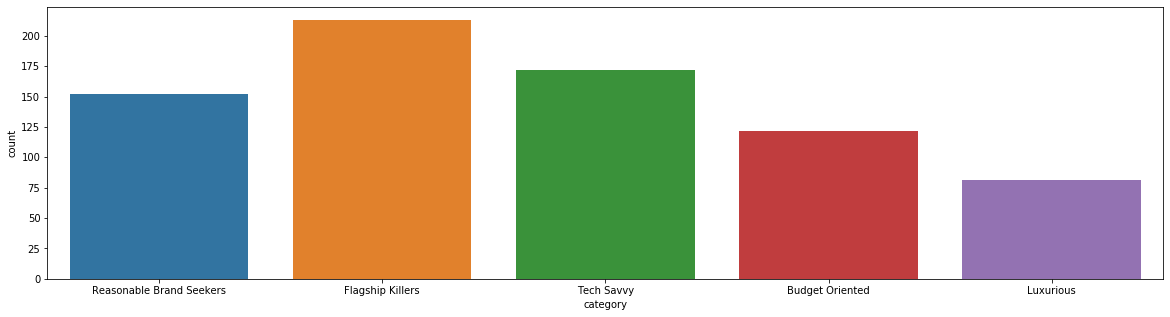

In [15]:
# Visualizing our Customers last purchase
def visualizing_user_last(last_purchase): 
    classisfying_user = pd.DataFrame(last_purchase.groupby('ID')['Score'].mean())
    classisfying_user.reset_index(inplace=True)
    classisfying_user['category'] = np.nan
    j = 0
    for row in classisfying_user.itertuples():
        if row.Score > 500 : 
            classisfying_user['category'][j] = 'Luxurious'
        elif row.Score > 375 : 
            classisfying_user['category'][j] = 'Tech Savvy'
        elif row.Score > 250 : 
            classisfying_user['category'][j] = 'Flagship Killers'
        elif row.Score > 125 : 
            classisfying_user['category'][j] = 'Reasonable Brand Seekers'
        else : 
            classisfying_user['category'][j] = 'Budget Oriented'
        j += 1
    fig = plt.figure(figsize=(20, 5))
    sns.countplot(data=classisfying_user, x='category')

visualizing_user_last(last_purchase)

In [16]:
def Offers_Customer(df):
    Offers=df[['ID','Count','Account_Created','Transaction_date']]
    Offers['Type']='Intermediate Customer'
    Offers['Type'].loc[Offers['Count']>3 ]='Regular Customer'
    Offers=Offers.drop_duplicates(subset="ID",keep='first')
    return Offers

Offers=Offers_Customer(df)
Offers

ID  Count  Account_Created  Transaction_date                   Type
0      1      1            392.0           18290.0  Intermediate Customer
1     19      2            388.0           18290.0  Intermediate Customer
2     37      3            400.0           18290.0  Intermediate Customer
3     45      9            387.0           18290.0       Regular Customer
5     69      2            389.0           18290.0  Intermediate Customer
..   ...    ...              ...               ...                    ...
989  577      1            368.0           18290.0  Intermediate Customer
991  644      1           1928.0           18290.0  Intermediate Customer
992  655      1            549.0           18290.0  Intermediate Customer
993  660      1            370.0           18290.0  Intermediate Customer
994  728      1            550.0           18290.0  Intermediate Customer

[740 rows x 5 columns]

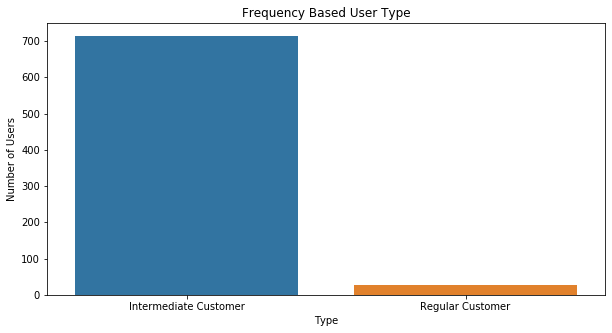

In [17]:
# Visualizing number of customers frequent in our organization
def visualizing_frequency(Offers):
    figure = plt.figure(figsize=(10,5))
    sns.countplot(data=Offers,x='Type')
    plt.title('Frequency Based User Type')
    plt.ylabel('Number of Users')
    plt.show()

visualizing_frequency(Offers)

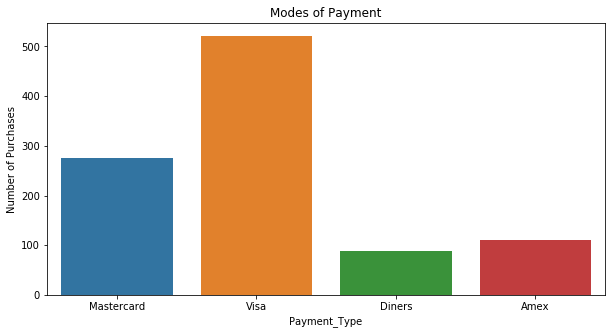

In [18]:
# Visualizing Payment Type done by our customers
def payment_type(payment):
    figure = plt.figure(figsize=(10,5))
    sns.countplot(data=payment,x='Payment_Type')
    plt.title('Modes of Payment')
    plt.ylabel('Number of Purchases')
    plt.show()

payment_type(df)    

In [19]:
import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
#Model1 Training & Testing
#Predicting Model for City

In [20]:
predict_model_for_city = create_demographics(df)

predict_model_for_city_X = predict_model_for_city.iloc[:,:-1].values
predict_model_for_city_y = predict_model_for_city.iloc[:,2].values
    
label_encoder_x1 = LabelEncoder()
label_encoder_x2 = LabelEncoder()
    
predict_model_for_city_X[:,0] = label_encoder_x1.fit_transform(predict_model_for_city_X[:,0])
predict_model_for_city_X[:,1] = label_encoder_x2.fit_transform(predict_model_for_city_X[:,1])
    
onehotencoder_x1 = OneHotEncoder(categorical_features=[0,1])
predict_model_for_city_X = onehotencoder_x1.fit_transform(predict_model_for_city_X).toarray()
label_encoder_y = LabelEncoder()
predict_model_for_city_y[:] = label_encoder_y.fit_transform(predict_model_for_city_y[:])
predict_model_for_city_y = predict_model_for_city_y.reshape(766,1)

X_train = predict_model_for_city_X[:,1:]
X_train = X_train[:,0:-1]
    
classifier = Sequential()
    
classifier.add(Dense(output_dim = int((959+58)/2), init = 'uniform', activation = 'relu', input_dim = 959))
classifier.add(Dense(output_dim = int((959+58)/2), init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 58, init = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
y_train = keras.utils.to_categorical(predict_model_for_city_y, num_classes=58)
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 20)


/Users/bhavesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





766/766 [==============================] - 4s 6ms/step - loss: 2.7676 - acc: 0.2977
Epoch 2/20
766/766 [==============================] - 2s 2ms/step - loss: 2.1488 - acc: 0.3329
Epoch 3/20
766/766 [==============================] - 2s 2ms/step - loss: 1.8607 - acc: 0.4413
Epoch 4/20
766/766 [==============================] - 2s 3ms/step - loss: 1.3357 - acc: 0.6527
Epoch 5/20
766/766 [==============================] - 2s 3ms/step - loss: 0.9312 - acc: 0.7624
Epoch 6/20
766/766 [==============================] - 2s 3ms/step - loss: 0.7072 - acc: 0.8290
Epoch 7/20
766/766 [==============================] - 2s 3ms/step - loss: 0.5330 - acc: 0.8642
Epoch 8/20
766/766 [==============================] - 2s 3ms/step - loss: 0.4109 - acc: 0.9034
Epoch 9/20
766/766 [==============================] - 2s 3ms/step - loss: 0.3283 - acc: 0.9204
Epoch 10/20
766/766 [======================

In [21]:
def predict_city(city, state):
    X = [[city],[state]]
    X[0] = label_encoder_x1.transform(X[0])
    X[1] = label_encoder_x2.transform(X[1])
    predict_X = onehotencoder_x1.transform([[X[0][0],X[1][0]]]).toarray()
    predict_X = predict_X[:,1:]
    predict_X = predict_X[:,0:-1]
    predictions = classifier.predict(predict_X)
    classes = np.argmax(predictions, axis=1)
    return label_encoder_y.inverse_transform([classes[0]])[0]

In [22]:
predict_city('Aberdeen', 'Scotland')

"'Samsung' 'Windows'"

In [24]:
#Model2 Training and Testing
#Getting Category of User on basis of Antutu Score

In [23]:
get_category_of_user=visualizing_user(df, False)
get_category_of_user=get_category_of_user.drop(columns=['ID'])
get_category_of_user_X = get_category_of_user.iloc[:,:-1].values
get_category_of_user_y = get_category_of_user.iloc[:,1:2].values

labelencoder_get_category_of_user_y = LabelEncoder()
get_category_of_user_y = labelencoder_get_category_of_user_y.fit_transform(get_category_of_user_y)

sc_get_category_of_user_X = StandardScaler()
get_category_of_user_X = sc_get_category_of_user_X.fit_transform(get_category_of_user_X)

predict_score_X_train, predict_score_X_test, predict_score_y_train, predict_score_y_test = train_test_split(get_category_of_user_X, get_category_of_user_y, test_size = 0.2, random_state = 0)

In [24]:
classifier_predict_user = Sequential()

classifier_predict_user.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu', input_dim = 1))

classifier_predict_user.add(Dense(output_dim = 5, init = 'uniform', activation = 'softmax'))

classifier_predict_user.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

y_train = keras.utils.to_categorical(get_category_of_user_y, num_classes=5)
classifier_predict_user.fit(get_category_of_user_X, y_train, batch_size = 10, nb_epoch = 200)

Epoch 1/200
740/740 [==============================] - 1s 2ms/step - loss: 1.5994 - acc: 0.3405
Epoch 2/200
740/740 [==============================] - 0s 230us/step - loss: 1.5568 - acc: 0.5757
Epoch 3/200
740/740 [==============================] - 0s 240us/step - loss: 1.4862 - acc: 0.4973
Epoch 4/200
740/740 [==============================] - 0s 242us/step - loss: 1.4129 - acc: 0.4054
Epoch 5/200
740/740 [==============================] - 0s 253us/step - loss: 1.3509 - acc: 0.3851
Epoch 6/200
740/740 [==============================] - 0s 316us/step - loss: 1.3011 - acc: 0.3932
Epoch 7/200
740/740 [==============================] - 0s 246us/step - loss: 1.2601 - acc: 0.4284
Epoch 8/200
740/740 [==============================] - 0s 283us/step - loss: 1.2252 - acc: 0.4351
Epoch 9/200
740/740 [==============================] - 0s 320us/step - loss: 1.1941 - acc: 0.4378
Epoch 10/200
740/740 [==============================] - 0s 335us/step - loss: 1.1651 - acc: 0.4419
Epoch 11/200
740/740 

740/740 [==============================] - 0s 290us/step - loss: 0.2397 - acc: 0.9000
Epoch 166/200
740/740 [==============================] - 0s 334us/step - loss: 0.2386 - acc: 0.9000
Epoch 167/200
740/740 [==============================] - 0s 274us/step - loss: 0.2370 - acc: 0.9000
Epoch 168/200
740/740 [==============================] - 0s 293us/step - loss: 0.2353 - acc: 0.9041
Epoch 169/200
740/740 [==============================] - 0s 314us/step - loss: 0.2336 - acc: 0.9014
Epoch 170/200
740/740 [==============================] - 0s 253us/step - loss: 0.2328 - acc: 0.9014
Epoch 171/200
740/740 [==============================] - 0s 267us/step - loss: 0.2308 - acc: 0.9014
Epoch 172/200
740/740 [==============================] - 0s 356us/step - loss: 0.2275 - acc: 0.9014
Epoch 173/200
740/740 [==============================] - 0s 265us/step - loss: 0.2198 - acc: 0.9014
Epoch 174/200
740/740 [==============================] - 0s 254us/step - loss: 0.2113 - acc: 0.9000
Epoch 175/200


In [25]:
def predict_user(score):
    X = [[score]]
    X = sc_get_category_of_user_X.transform(X)
    predictions = classifier_predict_user.predict(X)
    classes = np.argmax(predictions, axis=1)
    return labelencoder_get_category_of_user_y.inverse_transform([classes[0]])[0]

In [26]:
predict_user(450)

'Tech Savvy'

In [62]:
#Model3 Training and Testing
#Predicting Camera Lovers

In [27]:
predict_camera_lover=camera_lover=Camera_Lovers(df)
predict_camera_lover=predict_camera_lover.drop(columns=['ID'])
predict_camera_lover.head()

Front Camera  Rear Camera  Confidence           Type
872            32           40    0.833333  Selfie-Addict
877            32           40    0.833333  Selfie-Addict
875            32           40    0.833333  Selfie-Addict
874            32           40    0.833333  Selfie-Addict
876            32           40    0.833333  Selfie-Addict

In [28]:
predict_camera_lover_X = predict_camera_lover.iloc[:,:-1].values
predict_camera_lover_y = predict_camera_lover.iloc[:,3:4].values
predict_camera_lover_X
labelencoder_predict_camera_lover_y = LabelEncoder()
predict_camera_lover_y = labelencoder_predict_camera_lover_y.fit_transform(predict_camera_lover_y)

sc_predict_camera_lover_X = StandardScaler()
predict_camera_lover_X = sc_predict_camera_lover_X.fit_transform(predict_camera_lover_X)

In [29]:
classifier_predict_camera_lover = Sequential()

classifier_predict_camera_lover.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu', input_dim = 3))

classifier_predict_camera_lover.add(Dense(output_dim = 3, init = 'uniform', activation = 'softmax'))

classifier_predict_camera_lover.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

y_train = keras.utils.to_categorical(predict_camera_lover_y, num_classes=3)
classifier_predict_camera_lover.fit(predict_camera_lover_X, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
740/740 [==============================] - 1s 2ms/step - loss: 1.0512 - acc: 0.9000
Epoch 2/100
740/740 [==============================] - 0s 243us/step - loss: 0.9305 - acc: 0.9243
Epoch 3/100
740/740 [==============================] - 0s 316us/step - loss: 0.7775 - acc: 0.9297
Epoch 4/100
740/740 [==============================] - 0s 246us/step - loss: 0.6201 - acc: 0.9270
Epoch 5/100
740/740 [==============================] - 0s 242us/step - loss: 0.4846 - acc: 0.9392
Epoch 6/100
740/740 [==============================] - 0s 240us/step - loss: 0.3808 - acc: 0.9500
Epoch 7/100
740/740 [==============================] - 0s 249us/step - loss: 0.3060 - acc: 0.9500
Epoch 8/100
740/740 [==============================] - 0s 255us/step - loss: 0.2532 - acc: 0.9500
Epoch 9/100
740/740 [==============================] - 0s 275us/step - loss: 0.2147 - acc: 0.9500
Epoch 10/100
740/740 [==============================] - 0s 269us/step - loss: 0.1871 - acc: 0.9500
Epoch 11/100
740/740 

In [30]:
def predict_camera(front_camera, rear_camera):
    
    confidence = (front_camera*rear_camera)/(predict_camera_lover['Front Camera'].max()*predict_camera_lover['Rear Camera'].max())
    X = [[front_camera,rear_camera,confidence]]

    X = sc_predict_camera_lover_X.transform(X)
    
    predictions = classifier_predict_camera_lover.predict(X)
    classes = np.argmax(predictions, axis=1)
    return labelencoder_predict_camera_lover_y.inverse_transform([classes[0]])[0]

In [31]:
predict_camera(22, 30)

'Photophile'

In [87]:
#Model4 Training and Testing
#Predicting antutu score on the basis of processor,ram,storage,battery,score

In [32]:
def Antutu_Score(df):
    predict_score=df[['Processor','RAM','Storage','Battery','Score']]
    predict_score = predict_score.loc[:,~predict_score.columns.duplicated()]
    predict_score=predict_score.drop_duplicates(keep='first')
    return predict_score

antutu_score=Antutu_Score(df)
antutu_score

Processor  RAM  Storage  Battery  Score
0                   Apple A10 Fusion    2       32     1960  237.0
34             Samsung Exynos 9 Octa    4       64     3500  194.0
63           Qualcomm Snapdragon 710    6      128     2510  200.0
70             Samsung Exynos 9 Octa    4       64     3000  310.0
98                  Apple A11 Bionic    3       64     2691  340.0
..                               ...  ...      ...      ...    ...
989  Qualcomm Snapdragon 845            4       64     3430  280.0
990          Qualcomm Snapdragon 670    4       64     3000  160.0
991  Qualcomm Snapdragon 845            4       64     2915  275.0
992                    Unisoc SC9863    2       16     2600   76.5
993          Qualcomm Snapdragon 670    4       64     3700  165.0

[87 rows x 5 columns]

In [33]:
predict_score=Antutu_Score(df)
predict_score_X = predict_score.iloc[:,0:-1].values
predict_score_y = predict_score.iloc[:,4:5].values
labelencoder_predict_score_X = LabelEncoder()
predict_score_X[:,0] = labelencoder_predict_score_X.fit_transform(predict_score_X[:,0])
onehotencoder_predict_score_X = OneHotEncoder(categorical_features=[0])
predict_score_X = onehotencoder_predict_score_X.fit_transform(predict_score_X).toarray()
predict_score_X = predict_score_X[:,1:]
sc_predict_score_X = StandardScaler()
sc_predict_score_y = StandardScaler()
predict_score_X = sc_predict_score_X.fit_transform(predict_score_X)
predict_score_y = sc_predict_score_y.fit_transform(predict_score_y)
predict_score_X_train, predict_score_X_test, predict_score_y_train, predict_score_y_test = train_test_split(predict_score_X, predict_score_y, test_size = 0.0001, random_state = 0)

/Users/bhavesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [37]:
classifier_predict_score = Sequential()

classifier_predict_score.add(Dense(output_dim = int((50+1)/2), init = 'uniform', activation = 'relu', input_dim = 48))

classifier_predict_score.add(Dense(output_dim = int((50+1)/2), init = 'uniform', activation = 'relu'))
classifier_predict_score.add(Dense(output_dim = int((50+1)/2), init = 'uniform', activation = 'relu'))
classifier_predict_score.add(Dense(output_dim = int((50+1)/2), init = 'uniform', activation = 'relu'))
classifier_predict_score.add(Dense(output_dim = int((50+1)/2), init = 'uniform', activation = 'relu'))
classifier_predict_score.add(Dense(output_dim = int((50+1)/2), init = 'uniform', activation = 'relu'))
classifier_predict_score.add(Dense(output_dim = int((50+1)/2), init = 'uniform', activation = 'relu'))

classifier_predict_score.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier_predict_score.compile(loss='mean_squared_error', optimizer='adam')
classifier_predict_score.fit(predict_score_X_train, predict_score_y_train, validation_split=0.1 ,nb_epoch = 200)

Train on 77 samples, validate on 9 samples
Epoch 1/200
77/77 [==============================] - 3s 37ms/step - loss: 1.0419 - val_loss: 0.7522
Epoch 2/200
77/77 [==============================] - 0s 214us/step - loss: 1.0418 - val_loss: 0.7530
Epoch 3/200
77/77 [==============================] - 0s 457us/step - loss: 1.0417 - val_loss: 0.7533
Epoch 4/200
77/77 [==============================] - 0s 628us/step - loss: 1.0418 - val_loss: 0.7535
Epoch 5/200
77/77 [==============================] - 0s 496us/step - loss: 1.0417 - val_loss: 0.7534
Epoch 6/200
77/77 [==============================] - 0s 290us/step - loss: 1.0417 - val_loss: 0.7537
Epoch 7/200
77/77 [==============================] - 0s 283us/step - loss: 1.0416 - val_loss: 0.7540
Epoch 8/200
77/77 [==============================] - 0s 221us/step - loss: 1.0416 - val_loss: 0.7544
Epoch 9/200
77/77 [==============================] - 0s 213us/step - loss: 1.0415 - val_loss: 0.7547
Epoch 10/200
77/77 [=============================

Epoch 81/200
77/77 [==============================] - 0s 223us/step - loss: 0.0258 - val_loss: 0.2472
Epoch 82/200
77/77 [==============================] - 0s 263us/step - loss: 0.0261 - val_loss: 0.2434
Epoch 83/200
77/77 [==============================] - 0s 250us/step - loss: 0.0259 - val_loss: 0.2438
Epoch 84/200
77/77 [==============================] - 0s 227us/step - loss: 0.0258 - val_loss: 0.2456
Epoch 85/200
77/77 [==============================] - 0s 225us/step - loss: 0.0250 - val_loss: 0.2455
Epoch 86/200
77/77 [==============================] - 0s 247us/step - loss: 0.0254 - val_loss: 0.2483
Epoch 87/200
77/77 [==============================] - 0s 257us/step - loss: 0.0246 - val_loss: 0.2496
Epoch 88/200
77/77 [==============================] - 0s 249us/step - loss: 0.0251 - val_loss: 0.2503
Epoch 89/200
77/77 [==============================] - 0s 276us/step - loss: 0.0240 - val_loss: 0.2515
Epoch 90/200
77/77 [==============================] - 0s 250us/step - loss: 0.0250

In [38]:
def predict_antutu_score(processor, ram, storage, battery):
    X = [[processor],[ram],[storage],[battery]]
    X[0] = labelencoder_predict_score_X.transform(X[0])
    predict_X = onehotencoder_predict_score_X.transform([[X[0][0],X[1][0],X[2][0],X[3][0]]]).toarray()
    predict_X = predict_X[:,1:]
    predict_X = sc_predict_score_X.transform(predict_X)
    predictions = classifier_predict_score.predict(predict_X)
    predicted_score = sc_predict_score_y.inverse_transform(predictions)
    predicted_score = predicted_score[0][0]
    return predicted_score

In [39]:
predicted_score = predict_antutu_score('Samsung Exynos 9 Octa',8,32,2510)
predicted_score

371.39413

In [88]:
#Model5 Training and Testing
#Predicting wherther user is a brand lover or not

In [40]:
class style:
    BOLD = '\033[1m'
    END = '\033[0m'

In [41]:
def predict_category_of_users_who_can_buy(brand, processor, front_camera, rear_camera, ram, storage, battery):
    score = predict_antutu_score(processor, ram, storage, battery)
    print('=====================================================================')
    print('The predicted benchmark score of the mobile is '+style.BOLD+str(score)+style.END)
    print('=====================================================================')
    print('This particular mobile can be give as a recommendation to the following users')
    print(style.BOLD+'1. Based on the score with the score based categories of existing user'+style.END)
    print(str(predict_user(score)))
    print(style.BOLD+'2. Based on the Camera Specs which category of user will prefer'+style.END)
    camera_specs = predict_camera(front_camera, rear_camera)
    if camera_specs == "'Sensible'":
        print('Camera is avg hence it is not bought by camera lovers')
    else:
        print(camera_specs)
    if brand == 'Apple' or 'Samsung' or 'LG':
        print(style.BOLD+'3. Most Likely this mobile can be bought by people who are:'+style.END)
        print(brand+' Lovers')
    else:
        print(style.BOLD+'3. No Specific Brand Interest'+style.END)

In [42]:
predict_category_of_users_who_can_buy('Apple', 'Apple A13 Bionic', 12, 24, 6, 128, 3000)

The predicted benchmark score of the mobile is 493.12488
This particular mobile can be give as a recommendation to the following users
1. Based on the score with the score based categories of existing user
Luxurious
2. Based on the Camera Specs which category of user will prefer
Photophile
3. Most Likely this mobile can be bought by people who are:
Apple Lovers


In [47]:
#Model6 Training and Testing
#Predicting Brand LOver  for Users

In [43]:
predict_brand=Brand_lover(df)
predict_brand=predict_brand.drop(columns=['ID'])
predict_brand.drop(['Brand','Brandwise_Count'], axis=1, inplace=True)
predict_brand_y = predict_brand.iloc[:,13:14].values
predict_brand_X = predict_brand.drop(['Apple','Category'], axis=1).iloc[:,:-1].values
labelenocer_predict_brand_y = LabelEncoder()
predict_brand_y = labelenocer_predict_brand_y.fit_transform(predict_brand_y)
sc_predict_brand_X = StandardScaler()
predict_brand_X = sc_predict_brand_X.fit_transform(predict_brand_X)

In [44]:
classifier_predict_brand_lover = Sequential()

classifier_predict_brand_lover.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu', input_dim = 12))
classifier_predict_brand_lover.add(Dense(output_dim = 4, init = 'uniform', activation = 'softmax'))

classifier_predict_brand_lover.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

y_train = keras.utils.to_categorical(predict_brand_y, num_classes=4)
classifier_predict_brand_lover.fit(predict_brand_X, y_train, batch_size = 10, nb_epoch = 130)

Epoch 1/130
740/740 [==============================] - 2s 2ms/step - loss: 1.2998 - acc: 0.9500
Epoch 2/130
740/740 [==============================] - 0s 315us/step - loss: 0.9764 - acc: 0.9676
Epoch 3/130
740/740 [==============================] - 0s 259us/step - loss: 0.5636 - acc: 0.9676
Epoch 4/130
740/740 [==============================] - 0s 257us/step - loss: 0.3205 - acc: 0.9676
Epoch 5/130
740/740 [==============================] - 0s 241us/step - loss: 0.2203 - acc: 0.9676
Epoch 6/130
740/740 [==============================] - 0s 258us/step - loss: 0.1768 - acc: 0.9676
Epoch 7/130
740/740 [==============================] - 0s 261us/step - loss: 0.1539 - acc: 0.9676
Epoch 8/130
740/740 [==============================] - 0s 356us/step - loss: 0.1396 - acc: 0.9676
Epoch 9/130
740/740 [==============================] - 0s 378us/step - loss: 0.1299 - acc: 0.9676
Epoch 10/130
740/740 [==============================] - 0s 324us/step - loss: 0.1228 - acc: 0.9676
Epoch 11/130
740/740 

In [45]:
Brand_Lover = Brand_lover(df)
Camera_Lover = Camera_Lovers(df)
classisfying_user=visualizing_user(df, False)
temp = df.merge(classisfying_user)
temp_camera = df.merge(Camera_Lover)
def predict_mobile_for_users(ID):
    brand=pd.DataFrame(Brand_Lover.query('ID=='+str(ID))['Category']).reset_index(drop=True)
    brand = list(brand.Category)[0]
    print(style.BOLD+'1. Based on Mobile brands!!'+style.END)
    if brand != 'Sensible':
        print('The above person loves to buy phone a '+brand+'. Hence Recommending him those brand mobile phones are likely to be a good strategy')
    else:
        print('No specific Brand Interest')
    print('=====================================================================')
    print(style.BOLD+'2. Based on Type of User!!'+style.END)
    category = pd.DataFrame(classisfying_user.query('ID=='+str(ID))['category']).reset_index(drop=True)
    category = list(category.category)[0]
    print('The above person is a '+category)
    print('Hence mobile phones that could be Recommended to him are ')
    temp1=pd.DataFrame(temp.query('category=='+'"'+str(category)+'"'))
    temp1=temp1.drop_duplicates(subset="Model",keep='first')
    temp1 = temp1.head(3)
    print(list(temp1.Model))
    print('=====================================================================')
    print(style.BOLD+'3. Based on his Interest in Camera!!'+style.END)
    camera_type=pd.DataFrame(Camera_Lover.query('ID=='+str(ID))['Type']).reset_index(drop=True)
    camera_type = list(camera_type.Type)[0]
    if camera_type != 'Sensible':
        temp2=pd.DataFrame(temp_camera.query('Type=='+'"'+str(camera_type)+'"'))
        temp2=temp2.drop_duplicates(subset="Model",keep='first')
        temp2 = temp2.head(3)
        print('He is a Camera Lover i.e '+ camera_type +'and thus following phones can be recommended')
        print(list(temp2.Model))
        print('=====================================================================')
    else:
        print('Dont Recommend based on camera liking!!!')

In [48]:
predict_mobile_for_users(45)

1. Based on Mobile brands!!
The above person loves to buy phone a Apple Lover. Hence Recommending him those brand mobile phones are likely to be a good strategy
2. Based on Type of User!!
The above person is a Flagship Killers
Hence mobile phones that could be Recommended to him are 
['Samsung Galaxy S9e', 'Apple iPhone 8 Plus', 'Apple iPhone 8']
3. Based on his Interest in Camera!!
Dont Recommend based on camera liking!!!


In [4]:
df.head()

Transaction_date Payment_Type         City    State         Country  \
0  2019-01-02 06:17:00   Mastercard     Basildon  England  United Kingdom   
1  2019-01-06 07:45:00         Visa       London  England  United Kingdom   
2  2019-01-20 08:58:00         Visa     Edmonton  Alberta          Canada   
3  2019-01-09 15:32:00       Diners  Basingstoke  England  United Kingdom   
4  2019-01-17 10:14:00   Mastercard       Simcoe  Ontario          Canada   

       Account_Created           Last_Login  ID  Count  Brand           Model  \
0  2019-01-02 06:00:00  2019-01-02 06:08:00   1      1  Apple  Apple iPhone 7   
1  2019-01-06 07:00:00  2019-01-06 09:17:00  19      2  Apple  Apple iPhone 7   
2  2018-12-24 17:51:00  2019-02-18 09:42:00  37      3  Apple  Apple iPhone 7   
3  2019-01-07 12:31:00  2019-01-17 12:03:00  45      9  Apple  Apple iPhone 7   
4  2019-01-17 07:46:00  2019-02-18 18:49:00  45      9  Apple  Apple iPhone 7   

   Freq         Processor  Front Camera  Rear Camera  RAM  Storage  Battery  \
0    34  Apple A10 Fusion             7           12    2       32     1960   
1    34  Apple A10 Fusion             7           12    2       32     1960   
2    34  Apple A10 Fusion             7           12    2       32     1960   
3    34  Apple A10 Fusion             7           12    2       32     1960   
4    34  Apple A10 Fusion             7           12    2       32     1960   

   Score  
0  237.0  
1  237.0  
2  237.0  
3  237.0  
4  237.0

In [7]:
from faker import Faker
fake = Faker()
fake.name()

'Nathan Castro'

In [15]:
tem = pd.DataFrame()

In [47]:
tem['ID'] = df.ID.unique()

tem['Name'] = ""
for i in range (0,741):
    tem['Name'][i] = fake.name().lower()


In [48]:
tem.to_csv('name.csv',index=False)

In [69]:
temp = pd.read_csv('name.csv')

In [70]:
tem = temp.loc[(tem.Name.str.startswith('brandon', na=False))].head(8)
# for i in tem.loc[(tem.Name.str.startswith('b', na=False))].head(5)

In [72]:
data = []
for row in tem.itertuples():
    t = {"ID":row.ID,"name":row.Name}
    data.append(t)

In [10]:
df.loc[df['City']=='Basildon']['State'].unique().tolist()

['England']

In [4]:
df.head()

Transaction_date Payment_Type         City    State         Country  \
0  2019-01-02 06:17:00   Mastercard     Basildon  England  United Kingdom   
1  2019-01-06 07:45:00         Visa       London  England  United Kingdom   
2  2019-01-20 08:58:00         Visa     Edmonton  Alberta          Canada   
3  2019-01-09 15:32:00       Diners  Basingstoke  England  United Kingdom   
4  2019-01-17 10:14:00   Mastercard       Simcoe  Ontario          Canada   

       Account_Created           Last_Login  ID  Count  Brand           Model  \
0  2019-01-02 06:00:00  2019-01-02 06:08:00   1      1  Apple  Apple iPhone 7   
1  2019-01-06 07:00:00  2019-01-06 09:17:00  19      2  Apple  Apple iPhone 7   
2  2018-12-24 17:51:00  2019-02-18 09:42:00  37      3  Apple  Apple iPhone 7   
3  2019-01-07 12:31:00  2019-01-17 12:03:00  45      9  Apple  Apple iPhone 7   
4  2019-01-17 07:46:00  2019-02-18 18:49:00  45      9  Apple  Apple iPhone 7   

   Freq         Processor  Front Camera  Rear Camera  RAM  Storage  Battery  \
0    34  Apple A10 Fusion             7           12    2       32     1960   
1    34  Apple A10 Fusion             7           12    2       32     1960   
2    34  Apple A10 Fusion             7           12    2       32     1960   
3    34  Apple A10 Fusion             7           12    2       32     1960   
4    34  Apple A10 Fusion             7           12    2       32     1960   

   Score  
0  237.0  
1  237.0  
2  237.0  
3  237.0  
4  237.0